# 画像の閾値処理
## 目的
* このチュートリアルでは大局的閾値処理，適応的閾値処理，大津の二値化などを学ぶ．
* 次の関数の使い方を学ぶ : <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.threshold" target="_blank">cv2.threshold</A>,  <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.adaptive#cv2.adaptiveThreshold" target="_blank">cv2.adaptiveThreshold</A>

## 単純な閾値処理
閾値処理の方法は単純: 画素値が閾値より大きければある値(白色)を割り当て，そうでなければ別の値(黒色)を割り当てる。使われる関数は cv2.threshold(img, thresh, maxVal, type) で、第1引数imgは入力画像で グレースケール画像でなければならない ．第2引数threshは閾値で，画素を分類するのに使われ、第3引数maxValは閾値以上(指定により閾値以下のこともある)の値を持つ画素に対して割り当てられる値である．OpenCVは何通りかの閾値処理を用意しており，第4引数typeにて指定する．以下がtypeの値の一覧である:

* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.thresh#cv2.threshold"  target="_blank">OpenCVの公式ドキュメント</A>に各フラグがどのような処理をするかを記載しているので，確認してほしい．

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.threshold" target="_blank">cv2.threshold</A> は出力を２つ返す．出力の一つ retval については後述する．二つ目の出力が、閾値処理された後の 二値画像 である．

使用例のコード (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_thresholding/gradient.png">画像データgradient.png</A>)

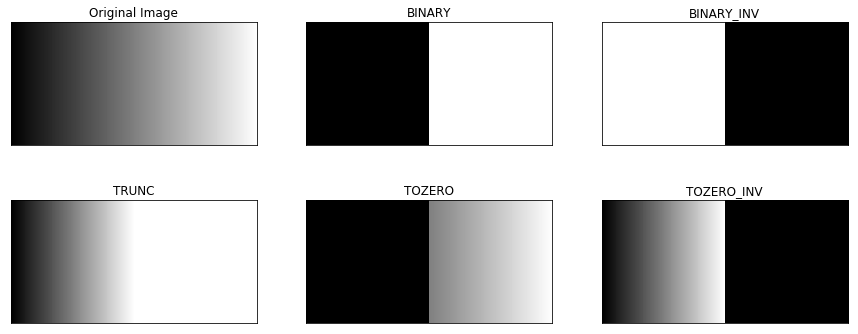

In [4]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,6))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 適応的閾値処理
先の例では、ある画像に対して一つの閾値を与えて閾値処理をした。しかし、撮影条件により画像領域で異なる光源環境となるような画像に対しては期待する結果が得られない．そういう状況では「適応的閾値処理」を使うと良い．適応的閾値処理では，画像の小領域ごとに閾値の値を計算する．そのため領域によって光源環境が変わるような画像に対しては，単純な閾値処理より良い結果が得られる．

適応的閾値処理には <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.adaptive#cv2.adaptiveThreshold" target="_blank"> cv2.adaptiveThreshold(AdaptiveMethod, BlockSize,C) </A>関数を使用し，次に示す3つの 「特殊な」入力パラメータを指定する．ただし`cv2.threshold` とは異なり，出力は一つ(二値画像)しかない．

* Adaptive Method(適応的処理) - 小領域中での閾値の計算方法
    * `cv2.ADAPTIVE_THRESH_MEAN_C` : 近傍領域の中央値を閾値とする．
    * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 近傍領域の重み付け平均値を閾値とする．重みの値はGaussian分布になるように計算．
* Block Size(領域サイズ): 閾値計算に使用する近傍領域のサイズ。ただし1より大きい奇数でなければならない．
* C (定数): 計算された閾値から引く定数．

次は，領域ごとに光源環境が大きく異なる画像に対して，単純な閾値処理と適応的閾値処理でどのように異なる結果が得られるかを示すコードの例である(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/dave.jpg">使用する画像</A>):

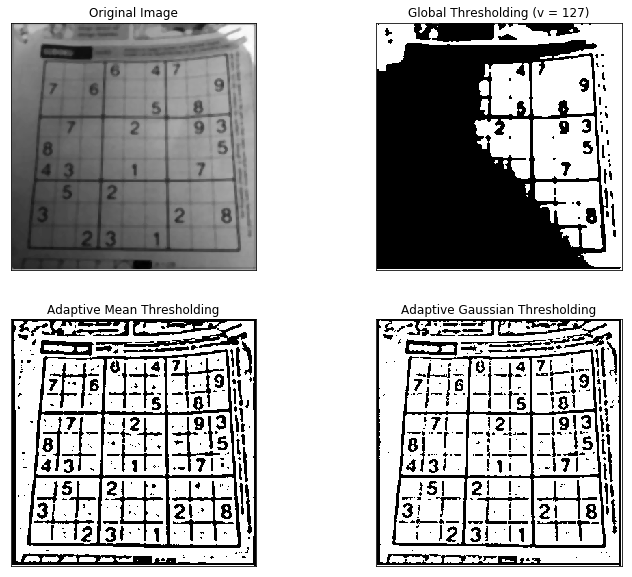

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 大津の二値化
前にあげた `cv2.threshold` 関数の二つ目の出力 retVal は大津の二値化に使われる．

大局的閾値処理では閾値の値は任意に定めることができる．では，どのような値を選べば良いのだろうか？何回か試行錯誤すればよいが，ここでは入力画像が bimodal image (ヒストグラムが双峰性を持つような画像)であることを仮定すると、そのような画像に対して，二つのピークの間の値を閾値として選べば良いと考えることであろう。これが大津の二値化の手法である．簡単に言うと，画像のヒストグラムを基に閾値を決定する方法と言える．そのため，双峰性を持たないヒストグラムを持つ画像に対しては良い結果が得られないことになる．

関数は大局的閾値処理と同じ `cv2.threshold` を使うが，引数に `cv2.THRESH_OTSU` を追加する必要がある. また閾値には0を指定する．これにより自動的に閾値を計算してくれ，二つ目の出力値である retVal として返してくれる．大津の二値化を使わない場合は， retVal の値は入力引数に指定した閾値と同じ値になる．

以下の例を見てみよう．ノイズが含まれる入力画像に対して３通りの方法を試している．一つ目の方法は閾値を127に設定した単純な閾値処理であり、二つ目の方法は大津の二値化を適用している．三つ目の方法は，$5\times 5$のサイズのGaussianフィルタでノイズを抑制した画像に対し大津の二値化を適用する． 平滑化処理によってノイズの影響が軽減されていることが分かる ([使用する画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/noisy2.png) )

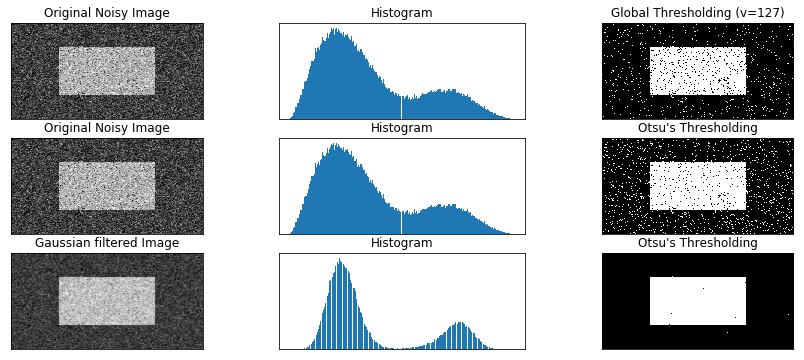

In [9]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

大津の二値化の仕組み
ここでは大津の二値化のPythonでの実装方法を説明する．興味がない人は飛ばして構わない．

双峰性ヒストグラムを持つ画像を扱っているので，大津のアルゴリズムは以下の式によって定義される 重み付けされたクラス内分散 を最小にするような閾値 (t) を探す:

$\displaystyle \sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)$

ここでそれぞれ変数は以下のように定義される．

$\displaystyle q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_1(t) = \sum_{i=t+1}^{I} P(i)$

$\displaystyle \mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)}$

$\displaystyle \sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_1(t)]^2 \frac{P(i)}{q_2(t)}$

実際には，双峰性ヒストグラムのピークの間に存在する閾値，すなわち二値化によって分類されるクラス内分散を二つのクラスとも最小にするような閾値 t を計算している．Pythonでの実装は以下のようになる:

In [10]:
import cv2
img = cv2.imread('noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

118 117.0


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


(今までのチュートリアルで扱っていない関数を幾つか使用しているが，これ以降のチュートリアルで扱うので安心せよ)

## 課題
1. 大津の二値化のために使用可能な最適化方法が幾つか存在する．調べて実装してみよ．
2. [以下の図](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/FigInBook.jpg)は書籍（平井有三(2012)「はじめてのパターン認識」森北出版）の図を写メしたものである。これを上の技術を用いて鮮明な図に変換してみよ.
<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/FigInBook.jpg" height="300" width="600"  />
3. [次の図](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/ticketTarget.png)はどうだろうか。適応的閾値処理と大津の二値化の両方を試してみよ。<BR>
<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/ticketTarget.png" height="400" width="200"  />
    <BR>
参考: このようになることが望ましい<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/ticketResult.png" height="400" width="200"  />
4. このような図にはどのようにしたらよいだろうか？元の図では3段階に色分けされている(文字を入れれば4通り)。
<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/Figs/threeClasses.png" height="400" width="400"  />

## 参考
* [OpenCvSharpをつかう　その15(適応的閾値処理)](http://schima.hatenablog.com/entry/2013/10/19/085019)
* クラスタリング(k-means法) --- 二値化は輝度によって2クラス分類しているものとみなせる。これを拡張して中間輝度をゆるす($n$クラス分類($3 \leq n$による閾値を求める）などの拡張が考えられよう

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [画像の幾何変換 geometricTransformations.ipynb](ttp://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/geometricTransformations.html)<BR>
回転や並進といった幾何変換を画像に適用する方法を学ぶ．
* 次の学習項目 [画像の平滑化 smoothing.ipynb]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/smoothing.html)<BR> 
画像の平滑化及び自作した線形フィルタを使った画像のフィルタリング方法を学ぶ．